In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

78

In [15]:
def populate():
    pop = [np.random.randint(0, 2, 10).tolist() for _ in range(10)]
    return pop

In [205]:
def fitness(row):
    size = 153
    value = 0
    weight = 0
    
    for i in range(len(row)): 
        if row[i] == 1:
            value = value + values[i]
            weight = weight + weights[i]
            
    if(weight>size):
        return 0
   
    return value

In [204]:
def mutate(pop):
    for i in range(len(pop)):
        row = pop[i]
        index = np.random.randint(0, 10)
        bit = row[index]
        #Ones = CountOnes(row) #count number of ones
        
        if bit == 0:
            row[index] = 1
        elif bit ==1:
            row[index] = 0
               
        pop[i] = row   
        
    return pop 

In [169]:
def CountOnes(row):
    counter = 0
    
    
    for j in range(len(row)): 
        if row[j] == 1:
            counter = counter +1
                
    return counter
    

In [52]:
def onepoint(pop):
    
    sortedpop = selection(pop)
    i = 0
    while i < len(pop):
        index = np.random.randint(0, 10)#split point
        parent1 = pop[sortedpop[i][1]]
        parent2 = pop[sortedpop[i+1][1]]
        
        child1 = parent1[:index]+parent2[index:]
        child2 = parent2[:index]+parent1[index:]
        
        if(fitness(child1)>fitness(parent1)):
            pop[sortedpop[i][1]] = child1
        if(fitness(child2)>fitness(parent2)):
            pop[sortedpop[i+1][1]] = child2
        
        i = i+2
        
    return pop 

In [11]:
def selection(pop):
    arr = [[0 for x in range(2)] for y in range(10)] 
    for i in range(len(pop)):
        arr[i][0] = fitness(pop[i])
        arr[i][1] = i #store index
        
        
    arr.sort(reverse = True)
    return arr



In [13]:
def avgfitness(pop):
    avg = 0
    for j in range(len(pop)):
        avg = avg + fitness(pop[j])
        
    avg = avg/len(pop)   
    return avg


In [138]:
def best(pop):
    best =0
    solution =[]
     
    for i in range(len(pop)):
        fitn = fitness(pop[i])
        if fitn>best:
            best = fitn
            solution = pop[i]
            
      
    return (best,solution)

In [206]:
average =[]
values = [78, 35, 89, 36, 94, 75, 74, 79, 80, 16]
weights = [18, 9, 23, 20, 59, 61, 70, 75, 76, 30]
pop = populate()

bestfitness = 0



for i in range(1000):
      
    pop = onepoint(pop)
    pop = mutate(pop)
    average.append(avgfitness(pop))
    
    #find best string
    testval,testsolution = best(pop)
  
    if testval >bestfitness: 
        bestfitness= testval
        bestsolution = testsolution.copy()
        

        

In [207]:
bestfitness


332

In [208]:
bestsolution

[1, 1, 1, 1, 1, 0, 0, 0, 0, 0]

In [191]:
fitness(bestsolution)

261

In [192]:
average

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 23.4,
 21.8,
 32.3,
 38.0,
 23.1,
 43.1,
 15.3,
 0.0,
 29.1,
 22.0,
 0.0,
 40.6,
 32.9,
 16.7,
 81.6,
 0.0,
 32.8,
 21.9,
 32.8,
 9.4,
 18.3,
 40.6,
 25.8,
 62.3,
 48.4,
 34.6,
 58.0,
 41.2,
 45.4,
 30.4,
 20.7,
 50.6,
 25.1,
 46.9,
 36.5,
 0.0,
 77.7,
 14.0,
 67.9,
 67.9,
 62.8,
 45.3,
 22.3,
 16.5,
 26.4,
 16.2,
 0.0,
 52.2,
 7.4,
 48.5,
 33.4,
 14.5,
 0.0,
 21.9,
 24.1,
 0.0,
 28.9,
 37.7,
 28.6,
 15.3,
 16.0,
 40.1,
 0.0,
 11.0,
 10.9,
 26.8,
 35.8,
 9.0,
 7.4,
 23.7,
 10.9,
 32.1,
 22.4,
 41.0,
 20.7,
 33.7,
 11.4,
 16.8,
 8.9,
 7.5,
 26.2,
 25.6,
 52.4,
 0.0,
 29.9,
 12.9,
 48.4,
 28.4,
 3.5,
 51.6,
 29.6,
 32.2,
 3.5,
 12.9,
 31.3,
 18.3,
 0.0,
 0.0,
 0.0,
 14.1,
 33.0,
 12.9,
 44.2,
 58.8,
 21.6,
 20.7,
 0.0,
 52.8,
 0.0,
 30.9,
 29.2,
 45.4,
 35.6,
 35.9,
 5.1,
 28.9,
 14.0,
 28.7,
 21.8,
 55.0,
 32.7,
 20.4,
 0.0,
 20.4,
 12.9,
 44.2,
 24.1,
 11.0,
 7.5,
 0.0,
 31.1,
 17.2,
 56.8,
 21.8,
 18.3,
 16.8,
 26.1,
 16.7,


Text(0.5, 1.0, 'Average fitness after 1000 generations')

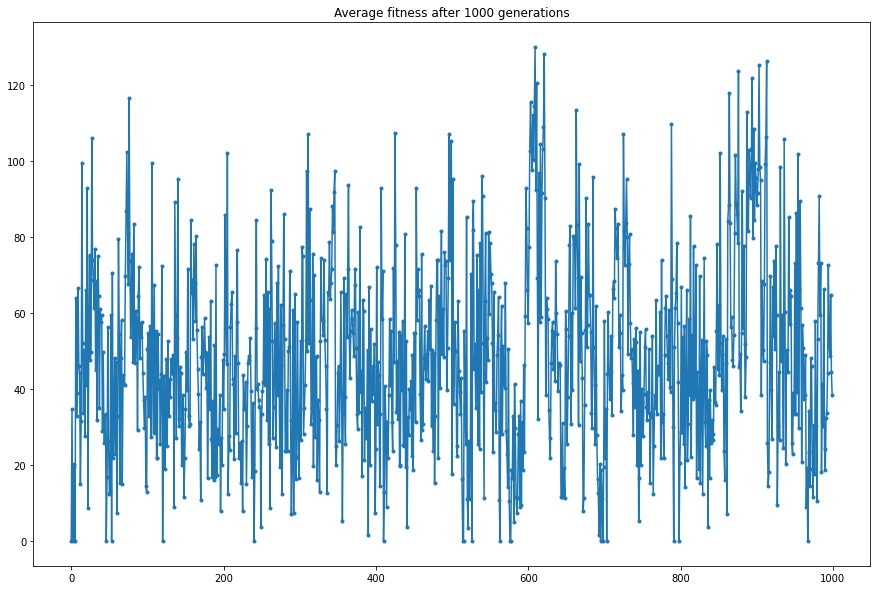

In [203]:
length = list(range(1000))
plt.figure(figsize=(15,10))
plt.plot(length,average,'o-',label="Fitness",ms = 3)
plt.title("Average fitness after 1000 generations")